In [1]:
from pathlib import Path
from os import listdir
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def plot_dens_wall_roof_side(dpe, u_bounds, title, renov):
    # Create density and unity density for each data
    x_roof = dpe.adedpe202006_logtype_ph_u.to_numpy()
    len_dens_roof = round((max(x_roof) - min(x_roof))/0.01)+1
    print("len_dens_roof", len_dens_roof)
    x_d_roof = np.linspace(min(x_roof), max(x_roof), len_dens_roof)
    density_roof = sum((abs(xi - x_d_roof) < 0.01) for xi in x_roof)
    unity_density_roof = density_roof / density_roof.sum()

    x_wall = dpe.adedpe202006_logtype_mur_u_ext.to_numpy()
    len_dens_wall = round((max(x_wall) - min(x_wall))/0.01)+1
    print("len_dens_wall",len_dens_wall)
    x_d_wall = np.linspace(min(x_wall), max(x_wall), len_dens_wall)
    density_wall = sum((abs(xi - x_d_wall) < 0.01) for xi in x_wall)
    unity_density_wall = density_wall / density_wall.sum()
    
    df_roof = pd.DataFrame({'x_d_roof':x_d_roof, 
                   'density_roof':density_roof,
                   'unity_density_roof':unity_density_roof,})
    
    df_wall = pd.DataFrame({'x_d_wall':x_d_wall,
                   'density_wall':density_wall,
                   'unity_density_wall':unity_density_wall,
                  })

    #plot 
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 4))
    fig.suptitle(title, y=1.05, fontweight = "heavy")
    fig.supxlabel('Valeur U [W/(m².K)]')

    # U-value boundaries
    uw_min = u_bounds[0]
    uw_max = u_bounds[1]
    uph_min = u_bounds[2]
    uph_max = u_bounds[3]

    # formats
    format_roof = {"color":"darkslateblue",  "label":'toit'}
    format_wall = {"color":"darkslateblue",  "label":'mur'}
    format_vline = {"linewidth":2, "color":'r', "alpha":0.5, "linestyle":"--"}
    offset = 0.1  
  
    
    # plot wall
    ax1.set_title(f'Mur extérieur\nvert: {renov["perc_below_lim_wall"]:.1f}%  -  '
                                  f'jaune: {renov["perc_within_lim_wall"]:.1f}%  -  '
                                  f'rouge:{renov["perc_above_lim_wall"]:.1f}%')
    ax1.fill_between(x_d_wall, unity_density_wall, **format_wall)
    ax1.axvspan(0, uw_min, alpha=0.15, color='green')
    ax1.axvspan(uw_min, uw_max, alpha=0.15, color='gold')
    ax1.axvspan(uw_max, x_wall.max(), alpha=0.15, color='red')

    #plot roof
    ax2.set_title(f'Toit\nvert: {renov["perc_below_lim_roof"]:.1f}%  -  '
                          f'jaune: {renov["perc_within_lim_wall"]:.1f}%  -  '
                          f'rouge: {renov["perc_above_lim_roof"]:.1f}%')
    ax2.fill_between(x_d_roof, unity_density_roof, **format_roof)
    ax2.axvspan(0, uph_min, alpha=0.15, color='green')
    ax2.axvspan(uph_min, uph_max, alpha=0.15, color='gold')
    ax2.axvspan(uph_max, x_roof.max(), alpha=0.15, color='red')
    plt.tight_layout

    plt.show()
    return fig, df_roof, df_wall

### plot function 

In [3]:
def plot_dens_wall_roof_legend(dpe, u_bounds, title, renov):
    # Create density and unity density for each data
    x_roof = dpe.adedpe202006_logtype_ph_u.to_numpy()
    len_dens_roof = round((max(x_roof) - min(x_roof))/0.01)+1
    print("len_dens_roof", len_dens_roof)
    x_d_roof = np.linspace(min(x_roof), max(x_roof), len_dens_roof)
    density_roof = sum((abs(xi - x_d_roof) < 0.01) for xi in x_roof)
    unity_density_roof = density_roof / density_roof.sum()

    x_wall = dpe.adedpe202006_logtype_mur_u_ext.to_numpy()
    len_dens_wall = round((max(x_wall) - min(x_wall))/0.01)+1
    print("len_dens_wall",len_dens_wall)
    x_d_wall = np.linspace(min(x_wall), max(x_wall), len_dens_wall)
    density_wall = sum((abs(xi - x_d_wall) < 0.01) for xi in x_wall)
    unity_density_wall = density_wall / density_wall.sum()
    
    df_roof = pd.DataFrame({'x_d_roof':x_d_roof, 
                   'density_roof':density_roof,
                   'unity_density_roof':unity_density_roof,})
    
    df_wall = pd.DataFrame({'x_d_wall':x_d_wall,
                   'density_wall':density_wall,
                   'unity_density_wall':unity_density_wall,
                  })

    #plot 
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 4))
    fig.suptitle(title, y=1.06, fontweight = "heavy")
    fig.supxlabel('Valeur U [W/(m².K)]')

    # U-value boundaries
    uw_min = u_bounds[0]
    uw_max = u_bounds[1]
    uph_min = u_bounds[2]
    uph_max = u_bounds[3]

    # formats
    format_roof = {"color":"darkslateblue",  }
    format_wall = {"color":"darkslateblue",  }
    format_vline = {"linewidth":2, "color":'r', "alpha":0.5, "linestyle":"--"}
    format_legend= {"bbox_to_anchor":(0.1, 1),
                    "ncol":3, 
                    "fancybox":True, 
                    "shadow":True,  
                    "borderaxespad":0.}
 
    
    # plot wall
    ax1.set_title('Mur extérieur', y =1.09)
    ax1.fill_between(x_d_wall, unity_density_wall, **format_wall)
    ax1.axvspan(0, uw_min, alpha=0.15, color='green', label=f'{renov["perc_below_lim_wall"]:.1f}%' )
    if x_wall.max() > uw_min :
        ax1.axvspan(uw_min, uw_max, alpha=0.15, color='gold', label=f'{renov["perc_within_lim_wall"]:.1f}%')
    if x_wall.max() > uw_max :
        ax1.axvspan(uw_max, x_wall.max(), alpha=0.15, color='red', label=f' {renov["perc_above_lim_wall"]:.1f}%')

    #plot roof
    ax2.set_title('Toit', y =1.09)        
    ax2.fill_between(x_d_roof, unity_density_roof, **format_roof)
    ax2.axvspan(0, uph_min, alpha=0.15, color='green', label=f'{renov["perc_below_lim_roof"]:.1f}%' )
    if x_roof.max() > uph_min :
        ax2.axvspan(uph_min, uph_max, alpha=0.15, color='gold', label=rf'{renov["perc_within_lim_roof"]:.1f}%')
    if x_roof.max() > uph_max :
        ax2.axvspan(uph_max, x_roof.max(), alpha=0.15, color='red', label=rf' {renov["perc_above_lim_roof"]:.1f}%')

    ax1.legend(**format_legend)
    ax2.legend(**format_legend)
#     plt.xlim(right=2.5)
#     ax1.set_xlim((0,2.52))
#     ax2.set_xlim((0,2.52))
    
    plt.show()
    
    return fig, df_roof, df_wall

In [4]:
def define_boundaries(dpe,bounds, csv):
    uw_min  = bounds.loc[csv, "Uw_min"]
    uw_max  = bounds.loc[csv, "Uw_max"]
    uph_min  = bounds.loc[csv, "Uph_min"]
    uph_max  = bounds.loc[csv, "Uph_max"]
    u_bounds = (uw_min, uw_max, uph_min, uph_max)
    # wall perc
    below_bound_wall = dpe[dpe["adedpe202006_logtype_mur_u_ext"] < uw_min]
    within_bound_wall = dpe[(dpe["adedpe202006_logtype_mur_u_ext"] >= uw_min) & 
                                (dpe["adedpe202006_logtype_mur_u_ext"] <= uw_max)] 
    above_bound_wall = dpe[dpe["adedpe202006_logtype_mur_u_ext"] > uw_max]
    # roof perc
    below_bound_roof = dpe[dpe["adedpe202006_logtype_ph_u"] < uph_min]
    within_bound_roof = dpe[(dpe["adedpe202006_logtype_ph_u"] >= uph_min) & 
                                    (dpe["adedpe202006_logtype_ph_u"] <= uph_max)] 
    above_bound_roof = dpe[dpe["adedpe202006_logtype_ph_u"] > uph_max]
    
    tables_wall = (below_bound_wall, within_bound_wall, above_bound_wall)
    tables_roof = (below_bound_roof, within_bound_roof, above_bound_roof)
    
    return u_bounds, tables_wall, tables_roof

In [5]:
def describe_renovation(tables_wall, tables_roof):

    # percentages --------------------------------------------------------
    perc_wall = [len(table) / len(dpe) * 100 for table in tables_wall]
    perc_roof = [len(table) / len(dpe) * 100 for table in tables_roof]
    
    renov_wall_perc = { "perc_below_lim_wall" : perc_wall[0],
                        "perc_within_lim_wall" : perc_wall[1],
                        "perc_above_lim_wall" : perc_wall[2],}
    renov_roof_perc = { "perc_below_lim_roof" : perc_roof[0],
                        "perc_within_lim_roof" : perc_roof[1],
                        "perc_above_lim_roof" : perc_roof[2]}
    
    renov_wall_perc = { k : round(v, 1) for (k,v) in renov_wall_perc.items()}  
    renov_roof_perc = { k : round(v, 1) for (k,v) in renov_roof_perc.items()}  
    
    # statistics ------------------------------------------------------------
    renov_wall = tables_wall[0]
    renov_roof = tables_roof[0]
    describe_index = ['count', 'mean', 'std', 'min', 'Q1', 'Q2', 'Q3', 'max']

    # wall
    renov_wall_describe = renov_wall.adedpe202006_logtype_mur_u_ext.describe()
    renov_wall_describe.index = describe_index
    renov_wall_stat = {"renov_wall_" + k : round(v, 3) for (k,v) in renov_wall_describe.to_dict().items()}  
    
    # roof
    renov_roof_describe = renov_roof.adedpe202006_logtype_ph_u.describe()
    renov_roof_describe.index = describe_index
    renov_roof_stat = {"renov_roof_" + k : round(v, 3) for (k,v) in renov_roof_describe.to_dict().items()}   
    
    resume_renov =  renov_wall_perc | renov_wall_stat | renov_roof_perc | renov_roof_stat
    
    return resume_renov

In [6]:
def describe_distribution(dpe):
    describe_index = ['count', 'mean', 'std', 'min', 'Q1', 'Q2', 'Q3', 'max']
    # wall
    dist_wall_describe = dpe.adedpe202006_logtype_mur_u_ext.describe()
    dist_wall_describe.index = describe_index
    dist_wall_stat = {"dist_wall_" + k : round(v, 3) for (k,v) in dist_wall_describe.to_dict().items()}  
    
    # roof
    dist_roof_describe = dpe.adedpe202006_logtype_ph_u.describe()
    dist_roof_describe.index = describe_index
    dist_roof_stat = {"dist_roof_" + k : round(v, 3) for (k,v) in dist_roof_describe.to_dict().items()}   
    
    resume_distribution =  dist_wall_stat | dist_roof_stat
    
    return resume_distribution

In [7]:
source_folder = Path(r"U:\WORK\assembled_same_U\with_complete_dpe_data\all")
save_fig_folder = Path(r"U:\WORK\code_gpd\data_analysis\analysis_assembled_archetypes\dpe_density_plots\plots_wall_roof")

## Density + boundary -  n_dpe > 300

In [8]:
dan_bound_path = r"U:\WORK\code_gpd\data_analysis\notebooks_danube\dispositifs_study\danube_U_values\Danube_with_U_bound_association.xlsx"
dan = pd.read_excel(dan_bound_path, index_col=0)
dan.head()

,USAGE,NOM_TYPOLOGIE,PERIODE,TERRITOIRE,DISPOSITIF_M1,PORTEUR_M1,EP_PORTEUR_M1,ISOLANT_M1,EP_ISOLANT_M1,REVETEMENT_INT_M1,...,Uph_min,Uph_max,Uw_0,Uw_min,Uw_max,archetype,one_one,two_one,many_one,fichier
0,BATIMENT AGRICOLE,BA,P1,FRANCE,PAV_M_P1_TBr_br,BRIQUE PLEINE,60,NON,0,ENDUIT,...,1.2,2.5,1.35,1.35,2.5,P1-BA-BATIMENT AGRICOLE-FRANCE,NaN,NaN,NaN,NaN
1,BATIMENT AGRICOLE,BA,P1,FRANCE_BOIS_ARDOISE,PAV_M_P1_TBo-bo,BOIS,50,IR,0,NON,...,1.2,2.5,0.80,0.80,2.5,P1-BA-BATIMENT AGRICOLE-FRANCE_BOIS_ARDOISE,NaN,NaN,NaN,NaN
2,BATIMENT AGRICOLE,BA,P1,FRANCE_BOIS_TUILE,PAV_M_P1_TBo-bo,BOIS,50,IR,0,NON,...,1.2,2.5,0.80,0.80,2.5,P1-BA-BATIMENT AGRICOLE-FRANCE_BOIS_TUILE,NaN,NaN,NaN,NaN
3,BATIMENT AGRICOLE,BA,P1,FRANCE_BRIQUE_TUILE,PAV_M_P1_TBr_br,BRIQUE PLEINE,60,NON,0,ENDUIT,...,1.2,2.5,1.35,1.35,2.5,P1-BA-BATIMENT AGRICOLE-FRANCE_BRIQUE_TUILE,NaN,NaN,NaN,NaN
4,BATIMENT AGRICOLE,BA,P1,FRANCE_PIERRE_CALCAIRE_ARDOISE,PAV_M_P1_TPi_Cal,CALCAIRE,80,NON,0,NON,...,1.2,2.5,1.50,1.50,2.5,P1-BA-BATIMENT AGRICOLE-FRANCE_PIERRE_CALCAIRE...,NaN,NaN,NaN,NaN


In [9]:
df_anlz = dan[dan['fichier'].notnull()]

file_gb = df_anlz[['archetype', 'fichier', 
                     'Uph_min', 
                     'Uph_max', 
                     'Uw_min', 
                     'Uw_max',
                    ]].groupby("fichier")

bounds = file_gb.agg({'Uw_min' : np.mean,
            'Uw_max' : np.mean,
            'Uph_min' : np.mean,
            'Uph_max' : np.mean})
print(len(bounds))
bounds

24


,Uw_min,Uw_max,Uph_min,Uph_max
fichier,,,,
dpe_all3-len_1010-P1-I-HABITAT-FRANCE_BOIS_TUILE-uniq.csv,0.800000,2.500000,1.200000,2.50000
dpe_all3-len_1074-P1-I-HABITAT-FRANCE_TERRE_TUILE-uniq.csv,1.500000,2.500000,1.200000,2.50000
dpe_all3-len_11838-P4-I-HABITAT-FRANCE-toit.csv,0.503067,0.890000,0.260870,0.33000
dpe_all3-len_13728-P3-I-HABITAT-FRANCE-toit.csv,0.800000,1.647059,0.400000,2.30000
dpe_all3-len_141836-P5-P-HABITAT-FRANCE-toit.csv,0.450000,0.560000,0.218182,0.30000
dpe_all3-len_144873-P4-P-HABITAT-FRANCE-toit.csv,0.571429,0.890000,0.260870,0.33000
dpe_all3-len_185528-P3-P-HABITAT-FRANCE-toit.csv,0.500000,1.110000,0.400000,2.30000
dpe_all3-len_2141-P1-P-HABITAT-FRANCE_BOIS_TUILE-uniq.csv,0.800000,2.500000,1.200000,2.50000
dpe_all3-len_214978-P6-P-HABITAT-FRANCE-toit.csv,0.350000,0.470000,0.171429,0.30000


### plot all


 P1-I-HABITAT-FRANCE_BOIS_TUILE
dpe_all3-len_1010-P1-I-HABITAT-FRANCE_BOIS_TUILE-uniq.csv
len_dens_roof 245
len_dens_wall 241


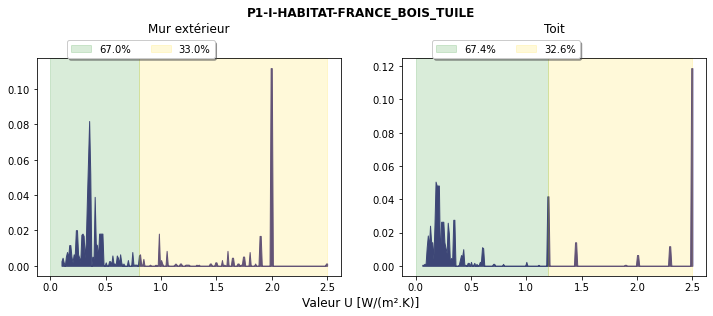


 P1-I-HABITAT-FRANCE_TERRE_TUILE
dpe_all3-len_1074-P1-I-HABITAT-FRANCE_TERRE_TUILE-uniq.csv
len_dens_roof 243
len_dens_wall 241


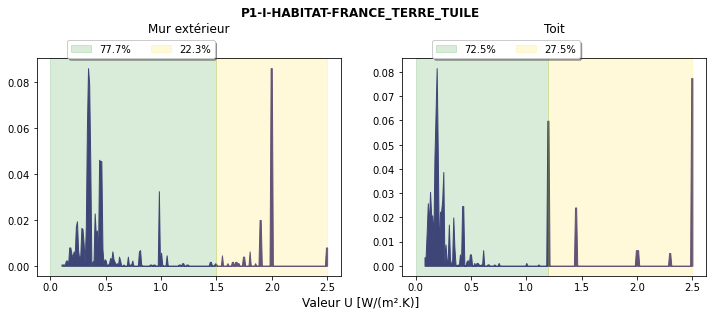


 P4-I-HABITAT-FRANCE
dpe_all3-len_11838-P4-I-HABITAT-FRANCE-toit.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (127,128,130,172,299,300,301) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_roof 295
len_dens_wall 281


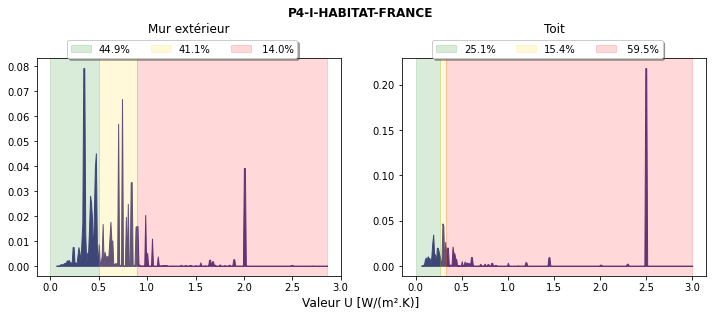


 P3-I-HABITAT-FRANCE
dpe_all3-len_13728-P3-I-HABITAT-FRANCE-toit.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (127,128,130,172,299,301) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_roof 352
len_dens_wall 299


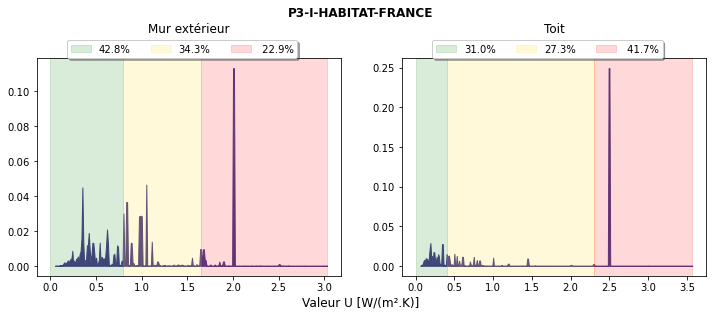


 P5-P-HABITAT-FRANCE
dpe_all3-len_141836-P5-P-HABITAT-FRANCE-toit.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (8,9,50,51,52,53,54,55,56,57,75,127,128,130,172,199,205,222,248,250,251,299,301,302,303,304) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_roof 246
len_dens_wall 257


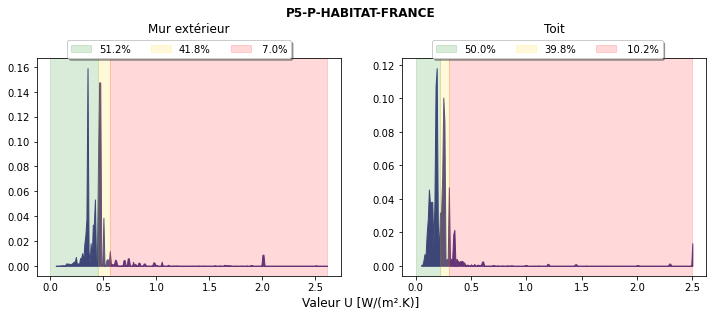


 P4-P-HABITAT-FRANCE
dpe_all3-len_144873-P4-P-HABITAT-FRANCE-toit.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (8,9,37,53,54,75,127,128,130,172,199,248,250,251,299,300,301,302,303,304) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_roof 246
len_dens_wall 346


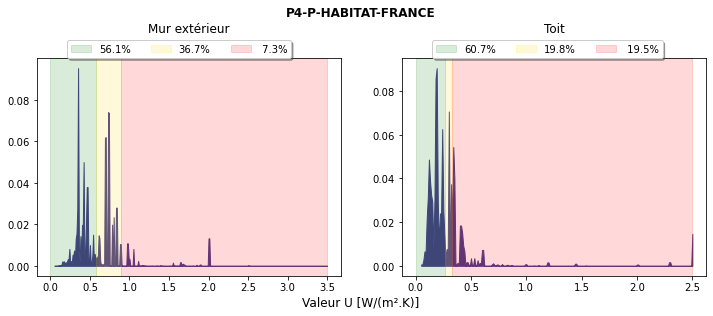


 P3-P-HABITAT-FRANCE
dpe_all3-len_185528-P3-P-HABITAT-FRANCE-toit.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (8,9,37,50,51,52,53,54,55,56,57,75,127,128,130,172,199,205,222,248,250,251,302,303,304) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_roof 413
len_dens_wall 296


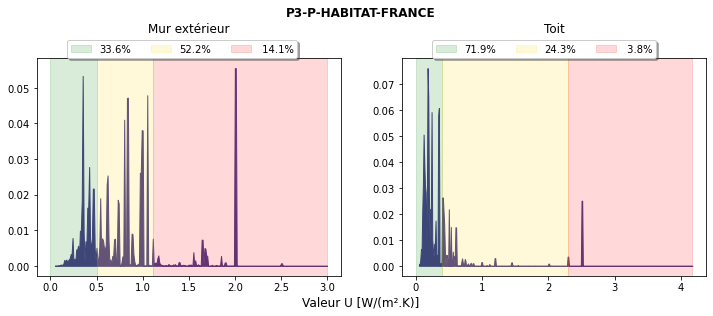


 P1-P-HABITAT-FRANCE_BOIS_TUILE
dpe_all3-len_2141-P1-P-HABITAT-FRANCE_BOIS_TUILE-uniq.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (53,54,75,199,248,250,251,302,303,304) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_roof 245
len_dens_wall 242


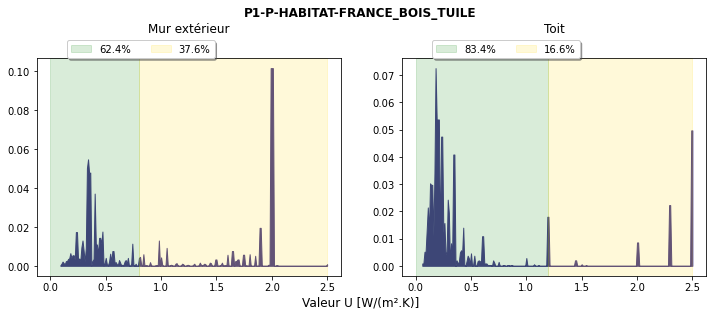


 P6-P-HABITAT-FRANCE
dpe_all3-len_214978-P6-P-HABITAT-FRANCE-toit.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (8,9,37,50,51,52,53,54,55,56,57,75,127,128,130,172,199,205,222,248,250,251,299,301,302,303,304) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_roof 246
len_dens_wall 496


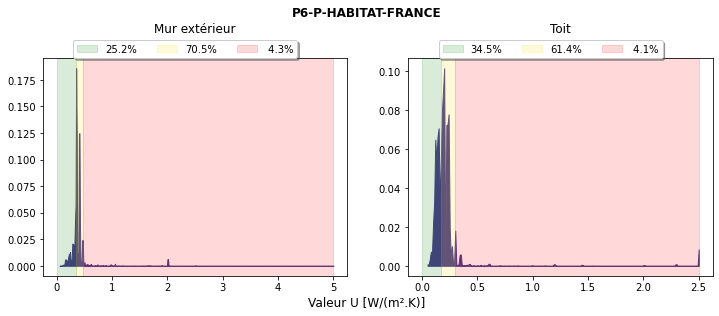


 P1-P-HABITAT-FRANCE_TERRE_TUILE
dpe_all3-len_2343-P1-P-HABITAT-FRANCE_TERRE_TUILE-uniq.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (8,9,75,172,248,251,303) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_roof 245
len_dens_wall 243


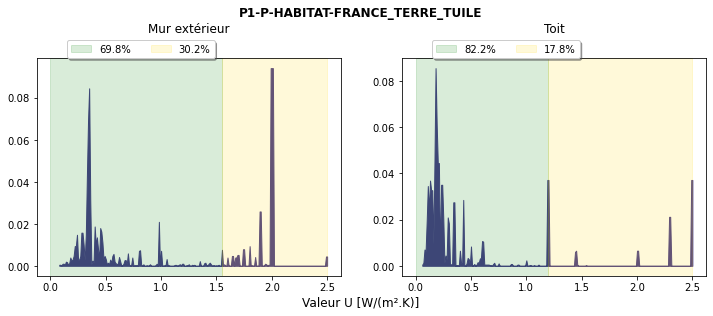


 P5-I-HABITAT-FRANCE
dpe_all3-len_23434-P5-I-HABITAT-FRANCE-toit.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (127,128,130,155,172,299,300,301) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_roof 295
len_dens_wall 266


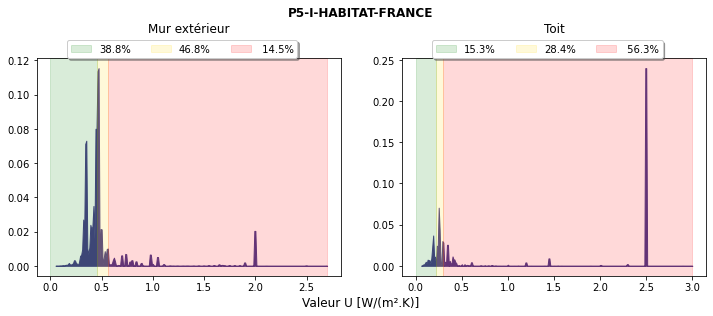


 P1-I-HABITAT-FRANCE_PIERRE
dpe_all3-len_24633-P1-I-HABITAT-FRANCE_PIERRE-rock.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (127,128,130,133,155,172,295,299,300,301,302,303,304) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_roof 418
len_dens_wall 338


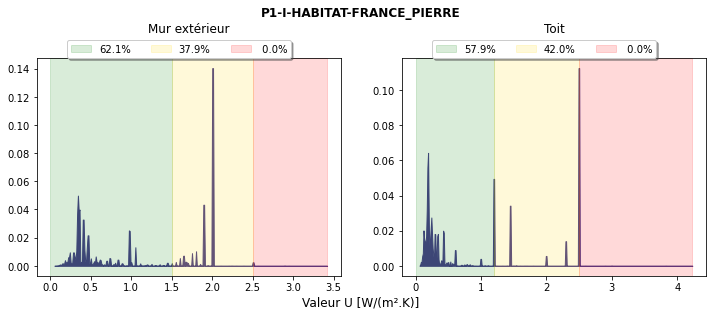


 P6-I-HABITAT-FRANCE
dpe_all3-len_31734-P6-I-HABITAT-FRANCE-toit.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (53,54,127,128,130,299,301) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_roof 246
len_dens_wall 296


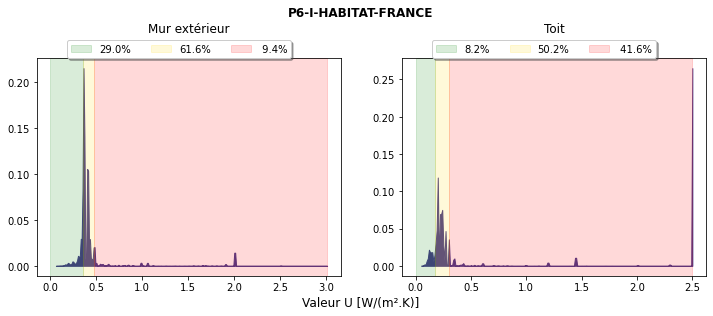


 P2-I-TERTIAIRE-FRANCE
dpe_all3-len_320-P2-I-TERTIAIRE-FRANCE-nati.csv
len_dens_roof 281
len_dens_wall 194


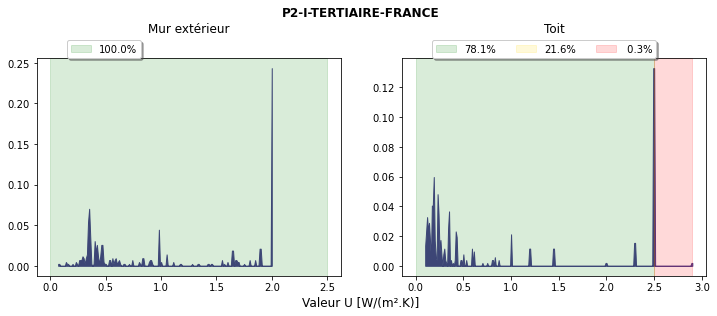


 P1-P-HABITAT-FRANCE_BRIQUE
dpe_all3-len_34181-P1-P-HABITAT-FRANCE_BRIQUE-toit.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (8,9,53,54,75,172,248,299,301,303) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_roof 270
len_dens_wall 285


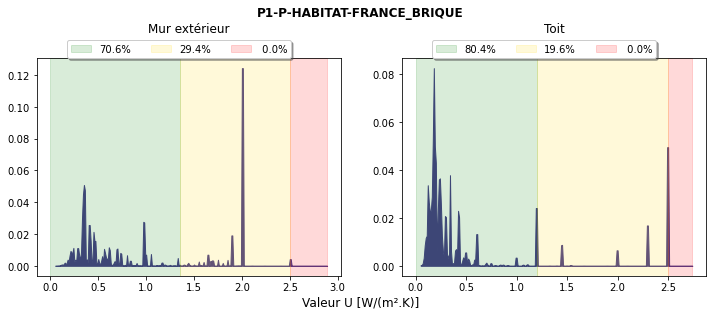


 P2-P-HABITAT-FRANCE
dpe_all3-len_349662-P2-P-HABITAT-FRANCE-toit.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (8,9,37,50,51,52,53,54,55,56,57,75,127,128,130,155,172,199,205,222,248,250,251,299,300,301,302,303,304) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_roof 436
len_dens_wall 431


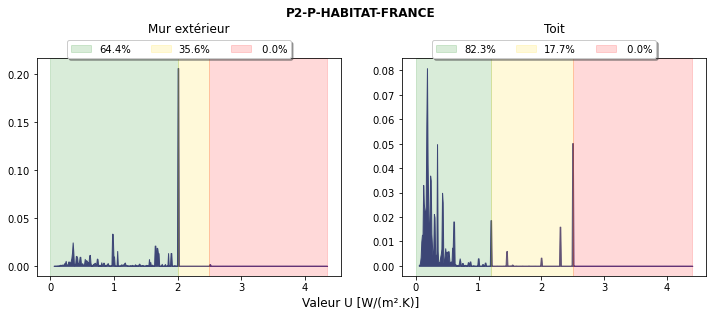


 P6-I-TERTIAIRE-FRANCE
dpe_all3-len_364-P6-I-TERTIAIRE-FRANCE-nati.csv
len_dens_roof 241
len_dens_wall 237


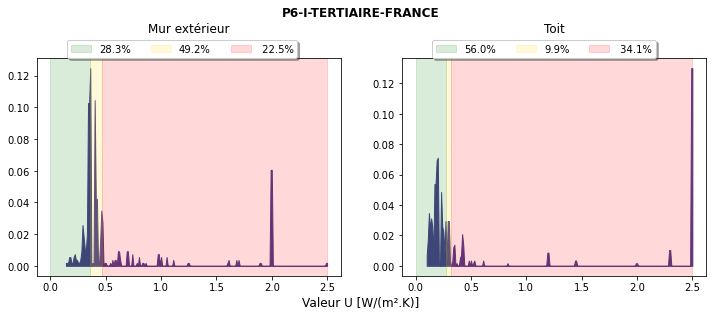


 P7-P-HABITAT-FRANCE
dpe_all3-len_48162-P7-P-HABITAT-FRANCE-toit.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (75,127,128,130,199,248,299,301,303,304) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_roof 246
len_dens_wall 426


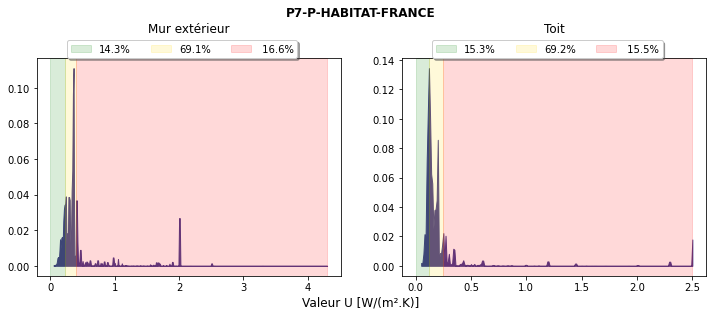


 P2-I-HABITAT-FRANCE
dpe_all3-len_49532-P2-I-HABITAT-FRANCE-toit.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (8,9,50,51,52,53,54,55,56,57,115,127,128,130,155,172,198,205,222,295,299,300,301,307) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_roof 416
len_dens_wall 416


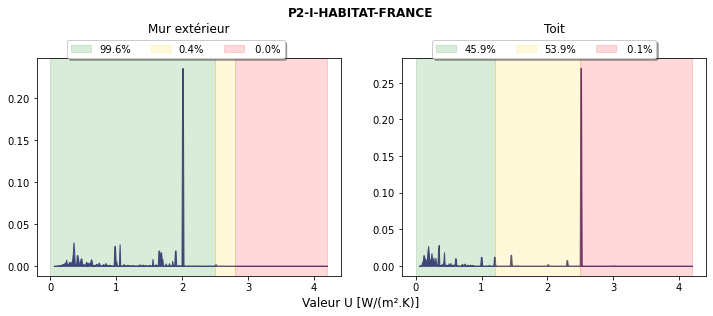


 P1-P-HABITAT-FRANCE_PIERRE
dpe_all3-len_52731-P1-P-HABITAT-FRANCE_PIERRE-rock.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (75,127,128,130,172,248,299,300,301) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_roof 458
len_dens_wall 247


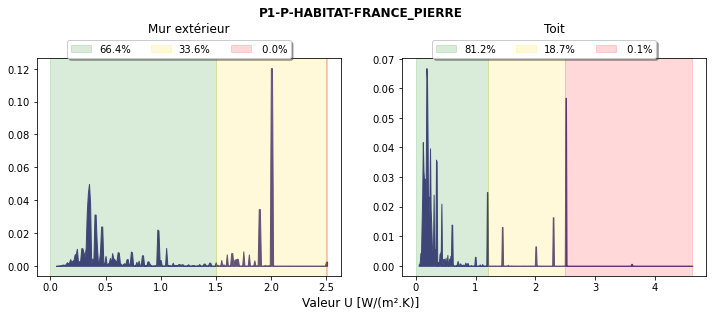


 P2-I-COMMERCE-FRANCE
dpe_all3-len_634-P2-I-COMMERCE-FRANCE-nati.csv
len_dens_roof 243
len_dens_wall 239


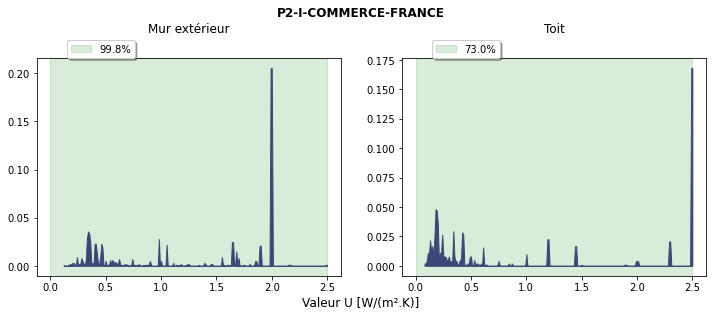


 P7-I-HABITAT-FRANCE
dpe_all3-len_9137-P7-I-HABITAT-FRANCE-toit.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (127,128,130,299,300,301) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_roof 245
len_dens_wall 245


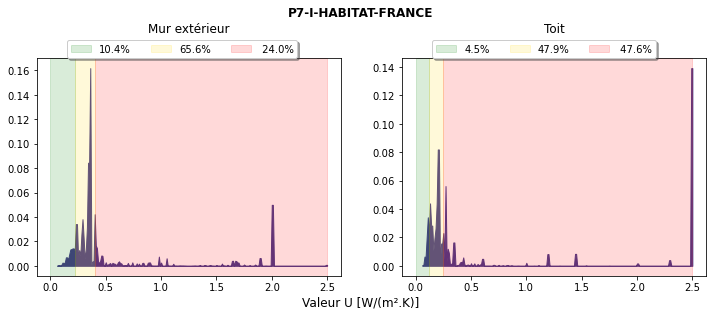


 P1-I-COMMERCE-FRANCE
dpe_all3-len_916-P1-I-COMMERCE-FRANCE-nati.csv
len_dens_roof 356
len_dens_wall 246


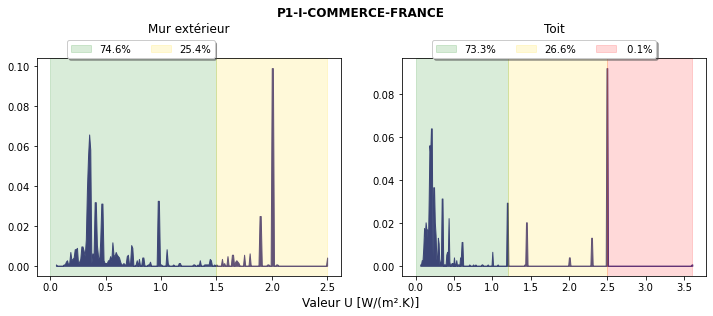


 P1-I-HABITAT-FRANCE_BRIQUE
dpe_all3-len_9405-P1-I-HABITAT-FRANCE_BRIQUE-toit.csv


C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (155,172,299,301) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


len_dens_roof 329
len_dens_wall 257


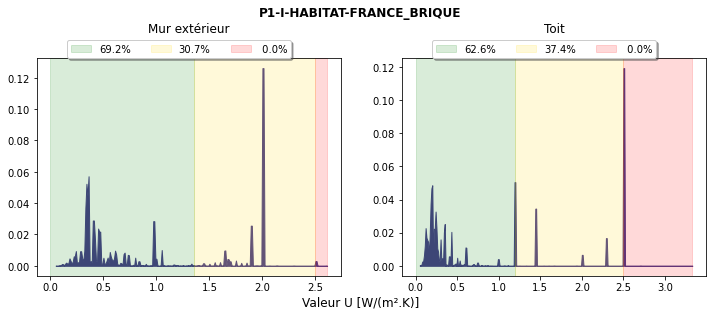

In [10]:
summary_data = {}
for csv in bounds.index:   
    path = source_folder / csv
    root_name = "-".join(path.stem.split("-")[2:-1]) 
    print("\n", root_name)
    print(csv)
    dpe = pd.read_csv(path)
    
    dpe

    # boundaries
    u_bounds, tables_wall, tables_roof = define_boundaries(dpe, bounds, csv)

    # percentage
    resume_distribution = describe_distribution(dpe)
    resume_renovation = describe_renovation(tables_wall, tables_roof)
    resume = resume_distribution | resume_renovation
    summary_data[csv] = resume

    # plot
    figure, df_roof, df_wall = plot_dens_wall_roof_legend(dpe, u_bounds, root_name, resume_renovation)
    save_fig_name = "Dens_" + root_name + ".png"
    figure.savefig(save_fig_folder / "side_by_side" / save_fig_name)    

In [11]:
pd.DataFrame(summary_data).T.reset_index().columns

Index(['index', 'dist_wall_count', 'dist_wall_mean', 'dist_wall_std',
       'dist_wall_min', 'dist_wall_Q1', 'dist_wall_Q2', 'dist_wall_Q3',
       'dist_wall_max', 'dist_roof_count', 'dist_roof_mean', 'dist_roof_std',
       'dist_roof_min', 'dist_roof_Q1', 'dist_roof_Q2', 'dist_roof_Q3',
       'dist_roof_max', 'perc_below_lim_wall', 'perc_within_lim_wall',
       'perc_above_lim_wall', 'renov_wall_count', 'renov_wall_mean',
       'renov_wall_std', 'renov_wall_min', 'renov_wall_Q1', 'renov_wall_Q2',
       'renov_wall_Q3', 'renov_wall_max', 'perc_below_lim_roof',
       'perc_within_lim_roof', 'perc_above_lim_roof', 'renov_roof_count',
       'renov_roof_mean', 'renov_roof_std', 'renov_roof_min', 'renov_roof_Q1',
       'renov_roof_Q2', 'renov_roof_Q3', 'renov_roof_max'],
      dtype='object')

In [12]:
df_resume = pd.DataFrame(summary_data).T.reset_index()
df_resume.rename(columns={"index":"fichier"}, inplace=True)
df_resume.head()

,fichier,dist_wall_count,dist_wall_mean,dist_wall_std,dist_wall_min,dist_wall_Q1,dist_wall_Q2,dist_wall_Q3,dist_wall_max,dist_roof_count,...,perc_within_lim_roof,perc_above_lim_roof,renov_roof_count,renov_roof_mean,renov_roof_std,renov_roof_min,renov_roof_Q1,renov_roof_Q2,renov_roof_Q3,renov_roof_max
0,dpe_all3-len_1010-P1-I-HABITAT-FRANCE_BOIS_TUI...,1010.0,0.809,0.681,0.10,0.34,0.40,1.50,2.50,1010.0,...,32.6,0.0,681.0,0.255,0.135,0.06,0.18,0.20,0.30,1.11
1,dpe_all3-len_1074-P1-I-HABITAT-FRANCE_TERRE_TU...,1074.0,0.779,0.671,0.10,0.33,0.40,0.98,2.50,1074.0,...,27.5,0.0,779.0,0.234,0.118,0.08,0.17,0.19,0.25,1.11
2,dpe_all3-len_11838-P4-I-HABITAT-FRANCE-toit.csv,11838.0,0.683,0.420,0.06,0.40,0.61,0.80,2.86,11838.0,...,15.4,59.5,2970.0,0.193,0.044,0.06,0.17,0.19,0.24,0.26
3,dpe_all3-len_13728-P3-I-HABITAT-FRANCE-toit.csv,13728.0,0.972,0.600,0.05,0.44,0.84,1.18,3.03,13728.0,...,27.3,41.7,4256.0,0.231,0.073,0.06,0.18,0.22,0.30,0.39
4,dpe_all3-len_141836-P5-P-HABITAT-FRANCE-toit.csv,141836.0,0.456,0.231,0.05,0.35,0.42,0.47,2.61,141836.0,...,39.8,10.2,70868.0,0.168,0.029,0.05,0.15,0.18,0.19,0.21


In [13]:
df_anlz_complete = pd.merge(df_anlz, df_resume, how="left", on="fichier", copy=False)
df_anlz_complete.columns

Index(['USAGE', 'NOM_TYPOLOGIE', 'PERIODE', 'TERRITOIRE', 'DISPOSITIF_M1',
       'PORTEUR_M1', 'EP_PORTEUR_M1', 'ISOLANT_M1', 'EP_ISOLANT_M1',
       'REVETEMENT_INT_M1',
       ...
       'perc_within_lim_roof', 'perc_above_lim_roof', 'renov_roof_count',
       'renov_roof_mean', 'renov_roof_std', 'renov_roof_min', 'renov_roof_Q1',
       'renov_roof_Q2', 'renov_roof_Q3', 'renov_roof_max'],
      dtype='object', length=117)

In [14]:
df_anlz_complete.head()

,USAGE,NOM_TYPOLOGIE,PERIODE,TERRITOIRE,DISPOSITIF_M1,PORTEUR_M1,EP_PORTEUR_M1,ISOLANT_M1,EP_ISOLANT_M1,REVETEMENT_INT_M1,...,perc_within_lim_roof,perc_above_lim_roof,renov_roof_count,renov_roof_mean,renov_roof_std,renov_roof_min,renov_roof_Q1,renov_roof_Q2,renov_roof_Q3,renov_roof_max
0,COMMERCE,I,P1,FRANCE,IMM_M_P1_TPI,PIERRE,90,NON,0,NON,...,26.6,0.1,671.0,0.265,0.156,0.06,0.18,0.20,0.30,1.07
1,HABITAT,I,P1,FRANCE_BOIS_TUILE,PAV_M_P1_TBo-bo,BOIS,50,IR,0,NON,...,32.6,0.0,681.0,0.255,0.135,0.06,0.18,0.20,0.30,1.11
2,HABITAT,I,P1,FRANCE_BRIQUE_TUILE,IMM_M_P1_TBr_br,BRIQUE PLEINE,60,NON,0,ENDUIT,...,37.4,0.0,5884.0,0.272,0.152,0.05,0.19,0.23,0.32,1.11
3,HABITAT,I,P1,FRANCE_PIERRE_CALCAIRE_ARDOISE,PAV_M_P1_TPi_Cal,CALCAIRE,80,NON,0,NON,...,42.0,0.0,14273.0,0.275,0.158,0.06,0.18,0.23,0.32,1.18
4,HABITAT,I,P1,FRANCE_PIERRE_CALCAIRE_TUILE,PAV_M_P1_TPi_Cal,CALCAIRE,80,NON,0,NON,...,42.0,0.0,14273.0,0.275,0.158,0.06,0.18,0.23,0.32,1.18


### Corresponding thickness 

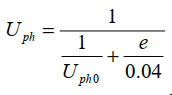

In [15]:
from IPython.display import Image
Image(filename = "e_formula.png", width=200, )

In [16]:
# e = ( 1/U - 1/U_0) * 0.04
# Whole distribution
# wall
df_anlz_complete["EP_ISOL_M1_dist_med"] = (( 1 / df_anlz_complete.dist_wall_Q2 - 1 / df_anlz_complete.Uw_0) * 0.04 * 100).round()
df_anlz_complete["EP_ISOL_M1_dist_moy"] = (( 1 / df_anlz_complete.dist_wall_mean - 1 / df_anlz_complete.Uw_0) * 0.04 * 100).round()
# roof
df_anlz_complete["EP_ISOL_T1_dist_moy"] = (( 1 / df_anlz_complete.dist_roof_mean - 1 / df_anlz_complete.Uph_0_moy) * 0.04 * 100).round()
df_anlz_complete["EP_ISOL_T1_dist_med"] = (( 1 / df_anlz_complete.dist_roof_Q2 - 1 / df_anlz_complete.Uph_0_moy) * 0.04 * 100).round()

# Renovation
# wall
df_anlz_complete["EP_ISOL_M1_renov_med"] = (( 1 / df_anlz_complete.renov_wall_Q2 - 1 / df_anlz_complete.Uw_0) * 0.04 * 100).round()
df_anlz_complete["EP_ISOL_M1_renov_moy"] = (( 1 / df_anlz_complete.renov_wall_mean - 1 / df_anlz_complete.Uw_0) * 0.04 * 100).round()
# roof
df_anlz_complete["EP_ISOL_T1_renov_moy"] = (( 1 / df_anlz_complete.renov_roof_mean - 1 / df_anlz_complete.Uph_0_moy) * 0.04 * 100).round()
df_anlz_complete["EP_ISOL_T1_renov_med"] = (( 1 / df_anlz_complete.renov_roof_Q2 - 1 / df_anlz_complete.Uph_0_moy) * 0.04 * 100).round()


In [17]:
df_anlz_complete

,USAGE,NOM_TYPOLOGIE,PERIODE,TERRITOIRE,DISPOSITIF_M1,PORTEUR_M1,EP_PORTEUR_M1,ISOLANT_M1,EP_ISOLANT_M1,REVETEMENT_INT_M1,...,renov_roof_Q3,renov_roof_max,EP_ISOL_M1_dist_med,EP_ISOL_M1_dist_moy,EP_ISOL_T1_dist_moy,EP_ISOL_T1_dist_med,EP_ISOL_M1_renov_med,EP_ISOL_M1_renov_moy,EP_ISOL_T1_renov_moy,EP_ISOL_T1_renov_med
0,COMMERCE,I,P1,FRANCE,IMM_M_P1_TPI,PIERRE,90,NON,0,NON,...,0.30,1.07,6.0,2.0,3.0,14.0,8.0,6.0,13.0,18.0
1,HABITAT,I,P1,FRANCE_BOIS_TUILE,PAV_M_P1_TBo-bo,BOIS,50,IR,0,NON,...,0.30,1.11,5.0,-0.0,2.0,11.0,6.0,6.0,13.0,18.0
2,HABITAT,I,P1,FRANCE_BRIQUE_TUILE,IMM_M_P1_TBr_br,BRIQUE PLEINE,60,NON,0,ENDUIT,...,0.32,1.11,5.0,1.0,2.0,9.0,7.0,5.0,12.0,15.0
3,HABITAT,I,P1,FRANCE_PIERRE_CALCAIRE_ARDOISE,PAV_M_P1_TPi_Cal,CALCAIRE,80,NON,0,NON,...,0.32,1.18,3.0,1.0,2.0,7.0,7.0,5.0,12.0,15.0
4,HABITAT,I,P1,FRANCE_PIERRE_CALCAIRE_TUILE,PAV_M_P1_TPi_Cal,CALCAIRE,80,NON,0,NON,...,0.32,1.18,3.0,1.0,2.0,7.0,7.0,5.0,12.0,15.0
5,HABITAT,I,P1,FRANCE_PIERRE_CALCAIRE_ZINC,PAV_M_P1_TPi_Cal,CALCAIRE,80,NON,0,NON,...,0.32,1.18,3.0,1.0,2.0,7.0,7.0,5.0,12.0,15.0
6,HABITAT,I,P1,FRANCE_PIERRE_GALET_TUILE,PAV_M_P1_TPi_Gal,GALET,60,NON,0,NON,...,0.32,1.18,3.0,2.0,2.0,7.0,8.0,6.0,12.0,15.0
7,HABITAT,I,P1,FRANCE_PIERRE_GNEISS_TUILE,PAV_M_P1_TPi_Gne,GNEISS,60,NON,0,ENDUIT,...,0.32,1.18,3.0,2.0,2.0,7.0,8.0,6.0,12.0,15.0
8,HABITAT,I,P1,FRANCE_PIERRE_GRANITE_ARDOISE,IMM_M_P1_TPi_Gra,GRANITE,80,NON,0,ENDUIT,...,0.32,1.18,3.0,1.0,2.0,7.0,7.0,5.0,12.0,15.0
9,HABITAT,I,P1,FRANCE_PIERRE_GRANITE_TUILE,IMM_M_P1_TPi_Gra,GRANITE,80,NON,0,ENDUIT,...,0.32,1.18,3.0,1.0,2.0,7.0,7.0,5.0,12.0,15.0


In [18]:
df_anlz_complete.to_excel("analyzed_groups_stats_U_e.xlsx")

In [55]:
list(df_anlz_complete.columns)

['USAGE',
 'NOM_TYPOLOGIE',
 'PERIODE',
 'TERRITOIRE',
 'DISPOSITIF_M1',
 'PORTEUR_M1',
 'EP_PORTEUR_M1',
 'ISOLANT_M1',
 'EP_ISOLANT_M1',
 'REVETEMENT_INT_M1',
 'EP_RI_M1',
 'REVETEMENT_EXT_M1',
 'EP_RE_M1',
 'DISPOSITIF_M2',
 'PORTEUR_M2',
 'EP_PORTEUR_M2',
 'ISOLANT_M2',
 'EP_ISOLANT_M2',
 'REVETEMENT_INT_M2',
 'EP_RI_M2',
 'REVETEMENT_EXT_M2',
 'EP_RE_M2',
 'DISPOSITIF_M3',
 'PORTEUR_M3',
 'EP_PORTEUR_M3',
 'ISOLANT_M3',
 'EP_ISOLANT_M3',
 'REVETEMENT_INT_M3',
 'EP_RI_M3',
 'REVETEMENT_EXT_M3',
 'EP_RE_M3',
 'DISPOSITIF_T2',
 'PORTEUR_T2',
 'EP_PORTEUR_T2',
 'ISOLANT_T2',
 'EP_ISOLANT_T2',
 'REVETEMENT_INT_T2',
 'EP_RI_T2',
 'REVETEMENT_EXT_T2',
 'EP_RE_T2',
 'TERRITOIRE_SHORT_ID',
 'TERRITOIRE_DESC',
 'NUMERO_PERIODE',
 'DATES',
 'DATE_DEBUT',
 'DATE_FIN',
 'POURCENTAGE_VITRAGE',
 'TYPE_VITRAGE',
 'PROTECTIONS_SOLAIRES',
 'VENTILATION',
 'PERMEABILITE',
 'COUVERTURE_ROUTE',
 'COMPACITE',
 'ID_PLANCHER',
 'PLANCHER_RDC',
 'EP_PLANCHER_RDC',
 'PLANCHER_INTERMEDIAIRE',
 'EP_PLANCHER_

In [56]:
cols_check = ['archetype',
 'ISOLANT_M1',
 'EP_ISOLANT_M1',
 'ISOLANT_T1',
 'EP_ISOLANT_T1',
  'dist_wall_count',
 'dist_wall_mean',
 'dist_wall_std',
 'dist_wall_min',
 'dist_wall_Q1',
 'dist_wall_Q2',
 'dist_wall_Q3',
 'dist_wall_max',
 'dist_roof_count',
 'dist_roof_mean',
 'dist_roof_std',
 'dist_roof_min',
 'dist_roof_Q1',
 'dist_roof_Q2',
 'dist_roof_Q3',
 'dist_roof_max',
 'perc_below_lim_wall',
 'perc_within_lim_wall',
 'perc_above_lim_wall',
 'renov_wall_count',
 'renov_wall_mean',
 'renov_wall_std',
 'renov_wall_min',
 'renov_wall_Q1',
 'renov_wall_Q2',
 'renov_wall_Q3',
 'renov_wall_max',
 'perc_below_lim_roof',
 'perc_within_lim_roof',
 'perc_above_lim_roof',
 'renov_roof_count',
 'renov_roof_mean',
 'renov_roof_std',
 'renov_roof_min',
 'renov_roof_Q1',
 'renov_roof_Q2',
 'renov_roof_Q3',
 'renov_roof_max',
 'EP_ISOL_M1_dist_med',
 'EP_ISOL_M1_dist_moy',
 'EP_ISOL_T1_dist_moy',
 'EP_ISOL_T1_dist_med',
 'EP_ISOL_M1_renov_med',
 'EP_ISOL_M1_renov_moy',
 'EP_ISOL_T1_renov_moy',
 'EP_ISOL_T1_renov_med']

In [61]:
cols_check_mur = ['archetype',
 'ISOLANT_M1',
 'EP_ISOLANT_M1',

  'dist_wall_count',
 'dist_wall_mean',
#  'dist_wall_std',
 'dist_wall_min',
 'dist_wall_Q1',
 'dist_wall_Q2',
 'dist_wall_Q3',
 'dist_wall_max',

 'perc_below_lim_wall',
 'perc_within_lim_wall',
 'perc_above_lim_wall',
 'renov_wall_count',
 'renov_wall_mean',
#  'renov_wall_std',
 'renov_wall_min',
 'renov_wall_Q1',
 'renov_wall_Q2',
 'renov_wall_Q3',
 'renov_wall_max',
 'EP_ISOL_M1_dist_med',
 'EP_ISOL_M1_dist_moy',
 'EP_ISOL_M1_renov_med',
 'EP_ISOL_M1_renov_moy',
 ]

In [62]:
df_anlz_complete[cols_check_mur].T.to_excel("resume_anl_mur.xlsx")

### Checking specific cases

#### case with orange plot

In [19]:
[arch for arch in dan.archetype.unique() if "P2-I-COMMERCE-FRANCE" in arch]

['P2-I-COMMERCE-FRANCE']

In [20]:
dan[dan.archetype == "P2-I-COMMERCE-FRANCE"]
# lim max = 2.9 > highest case
# red goes in the opposite direction
# probabily boundaries of Danube need to be revised

,USAGE,NOM_TYPOLOGIE,PERIODE,TERRITOIRE,DISPOSITIF_M1,PORTEUR_M1,EP_PORTEUR_M1,ISOLANT_M1,EP_ISOLANT_M1,REVETEMENT_INT_M1,...,Uph_min,Uph_max,Uw_0,Uw_min,Uw_max,archetype,one_one,two_one,many_one,fichier
103,COMMERCE,I,P2,FRANCE,IMM_M_P2_TN_BB,BETON BANCHE,20,NON,0,ENDUIT,...,2.5,2.5,2.9,2.5,2.9,P2-I-COMMERCE-FRANCE,dpe_all3-len_634-P2-I-COMMERCE-FRANCE-nati.csv,NaN,NaN,dpe_all3-len_634-P2-I-COMMERCE-FRANCE-nati.csv


#### case with high percentage in the red

In [21]:
csv = r"dpe_all3-len_11838-P4-I-HABITAT-FRANCE-toit.csv"
path = source_folder / csv

p4_test = pd.read_csv(path, index_col=0)

C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (127,128,130,172,299,300,301) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [22]:
dan_p4_test = dan[dan.fichier == csv]
dan_p4_test

,USAGE,NOM_TYPOLOGIE,PERIODE,TERRITOIRE,DISPOSITIF_M1,PORTEUR_M1,EP_PORTEUR_M1,ISOLANT_M1,EP_ISOLANT_M1,REVETEMENT_INT_M1,...,Uph_min,Uph_max,Uw_0,Uw_min,Uw_max,archetype,one_one,two_one,many_one,fichier
148,HABITAT,I,P4,FRANCE_ARDOISE,IMM_M_P4_TN_BB_isol,BETON BANCHE,40,ITE_LM,6,CONTRE CLOISON,...,0.26087,0.33,2.05,0.503067,0.89,P4-I-HABITAT-FRANCE_ARDOISE,NaN,dpe_all3-len_11838-P4-I-HABITAT-FRANCE-toit.csv,NaN,dpe_all3-len_11838-P4-I-HABITAT-FRANCE-toit.csv
149,HABITAT,I,P4,FRANCE_TUILE,IMM_M_P4_TN_BB_isol,BETON BANCHE,40,ITE_LM,6,CONTRE CLOISON,...,0.26087,0.33,2.05,0.503067,0.89,P4-I-HABITAT-FRANCE_TUILE,NaN,dpe_all3-len_11838-P4-I-HABITAT-FRANCE-toit.csv,NaN,dpe_all3-len_11838-P4-I-HABITAT-FRANCE-toit.csv


In [23]:
[var for var in  list(p4_test.columns) if "cons" in var]

['adedpe202006_logtype_ratio_ges_conso',
 'adedpe202006_min_conso_ener',
 'adedpe202006_max_conso_ener',
 'mtedle2019_elec_conso_res_par_pdl_res',
 'mtedle2019_elec_conso_tot_par_m2_tot',
 'mtedle2019_gaz_conso_res_par_pdl_res',
 'mtedle2019_gaz_conso_tot_par_m2_tot_corr',
 'adedpe202006_logtype_classe_conso_ener',
 'adedpe202006_logtype_conso_ener',
 'adedpe202006_mean_conso_ener',
 'adedpe202006_mean_class_conso_ener',
 'adedpe202006_std_conso_ener',
 'cerffo2020_annee_construction',
 'mtedle2019_elec_conso_pro',
 'mtedle2019_elec_conso_pro_par_m2_pro',
 'mtedle2019_elec_conso_res',
 'mtedle2019_elec_conso_res_par_m2_res',
 'mtedle2019_elec_conso_tot',
 'mtedle2019_gaz_conso_pro',
 'mtedle2019_gaz_conso_pro_par_m2_pro_corr',
 'mtedle2019_gaz_conso_res',
 'mtedle2019_gaz_conso_res_par_m2_res_corr',
 'mtedle2019_gaz_conso_tot']

In [24]:
sorted(p4_test.cerffo2020_annee_construction.unique())
# the attribution of construction dates is correct

[1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0]

- **La limite supérieure de U est majoritairement issue de l'hypothèse oùu le mur est inconnue, celle qui ne dépend pas des dispositifs Danube, mais uniquement des dates de construcions des bâtiments présentes pour un arquétype associé à une période**

- **Dans les annés proches de limites de définition des périodes, il peut avoir une différence entre la catégorie d'anné de la méthode 3CL et de Danube. Ce qui peut avoir une variation legere des limites pour les hypothèses où de valeurs forfaitaires sont utilisés.**

- **Est-ce qu'on doit considérer les dpe de ces bâtiments qui ont une performance au dessus de celle prévu par l'hypothèse inconnue comme des dpe non fiables ?**

- **si oui, est-ce qu'on écarte ces données et défini le omega seulement les dpe qui sont au dessous de la limite supérieur ? Je pense que non, car cela irait augmenter encore plus le percentage des bâtiments rénovés.**



In [25]:
mat_vars = [var for var in  list(p4_test.columns) if "mat" in var]

In [26]:
for mat_var in mat_vars:
    print(mat_var)
#     print(p4_test[mat_var].unique(),"\n")
    print(p4_test[mat_var].value_counts() / len(p4_test) * 100,"\n")

cerffo2020_mat_mur
30.0    24.522723
50.0    14.977192
0.0     14.605508
35.0     7.915188
40.0     7.442135
34.0     5.921608
10.0     5.693529
90.0     3.218449
20.0     2.508870
13.0     1.503632
39.0     1.368474
23.0     1.131948
15.0     0.946106
49.0     0.844737
3.0      0.718027
45.0     0.692685
36.0     0.642000
5.0      0.506842
9.0      0.481500
25.0     0.456158
1.0      0.447711
12.0     0.413921
14.0     0.397027
59.0     0.380132
19.0     0.363237
29.0     0.287211
56.0     0.236526
60.0     0.177395
4.0      0.160500
46.0     0.160500
24.0     0.101368
16.0     0.092921
26.0     0.092921
2.0      0.084474
53.0     0.084474
43.0     0.076026
69.0     0.050684
31.0     0.042237
54.0     0.025342
32.0     0.025342
42.0     0.016895
6.0      0.016895
95.0     0.008447
93.0     0.008447
91.0     0.008447
41.0     0.008447
Name: cerffo2020_mat_mur, dtype: float64 

cerffo2020_mat_toit
10.0    48.842710
0.0     14.554823
20.0    10.677479
40.0     9.156952
90.0     8.278425


#### checking case P6 P

In [33]:
path_p6p = source_folder / "dpe_all3-len_214978-P6-P-HABITAT-FRANCE-toit.csv"
df_p6p = pd.read_csv(path_p6p)

C:\Users\ldecarva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (8,9,37,50,51,52,53,54,55,56,57,75,127,128,130,172,199,205,222,248,250,251,299,301,302,303,304) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [35]:
df_p6p[df_p6p.adedpe202006_logtype_mur_u_ext > 2.5][["adedpe202006_logtype_mur_u_ext"]]

,adedpe202006_logtype_mur_u_ext
9653,3.87
56485,3.50
65323,4.35
65329,4.35
65330,4.35
65331,4.35
65332,4.35
79390,2.65
86155,4.19
86860,2.67


In [40]:
[col for col in df_p6p.columns if "const" in col]

['cerffo2020_annee_construction']

In [49]:
res_df = df_p6p[df_p6p.adedpe202006_logtype_mur_u_ext > 2.5][['cerffo2020_annee_construction']+
                                                    [col for col in df_p6p.columns if "_logtype_mur" in col]]
col_bef = ['cerffo2020_annee_construction', 
             'adedpe202006_logtype_mur_ep_mat_ext',
            'adedpe202006_logtype_mur_mat_ext',
            'adedpe202006_logtype_mur_pos_isol_ext',
            'adedpe202006_logtype_mur_u_ext']
col_aft = ['anné_contruction',
             'mur_ep_mat_ext',
            'mur_mat_ext',
            'mur_pos_isol_ext',
            'mur_u_ext']
res_df.columns = col_aft
res_df

,anné_contruction,mur_ep_mat_ext,mur_mat_ext,mur_pos_isol_ext,mur_u_ext
9653,2012.0,20,murs en briques creuses,ITI+ITR,3.87
56485,2012.0,NaN,NaN,ITI,3.50
65323,2009.0,NaN,murs en blocs de béton creux,ITI,4.35
65329,2002.0,NaN,murs en blocs de béton creux,ITI,4.35
65330,2002.0,NaN,murs en blocs de béton creux,ITI,4.35
65331,2002.0,NaN,murs en blocs de béton creux,ITI,4.35
65332,2004.0,NaN,murs en blocs de béton creux,ITI,4.35
79390,2005.0,NaN,cloison de plâtre,non isole,2.65
86155,2005.0,NaN,murs en pierre,ITR,4.19
86860,2008.0,NaN,NaN,ITR,2.67


In [53]:
len(res_df)/ len(df_p6p) * 100

0.006512294281275294